In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = training_set.iloc[:,1:2].values

Feature Scaling, here we are normalizing our data, since our LSTM model contain sigmoid function which takes values from  to 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [6]:
training_set.shape

(1258, 1)

Here our input will be stock price at time t and output will stock price at time t+1

In [7]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [8]:
y_train.shape

(1257, 1)

Reshape the training set as given on keras documentation

In [9]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [10]:
X_train.shape

(1257, 1, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


Initialization the RNN

In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

In [14]:
regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [16]:
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 748us/step - loss: 0.0915
Epoch 2/200
1257/1257 [==============================] - 0s 78us/step - loss: 0.0674
Epoch 3/200
1257/1257 [==============================] - 0s 83us/step - loss: 0.0604
Epoch 4/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.0580
Epoch 5/200
1257/1257 [==============================] - 0s 86us/step - loss: 0.0556
Epoch 6/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.0533
Epoch 7/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.0509
Epoch 8/200
1257/1257 [==============================] - 0s 93us/step - loss: 0.0484
Epoch 9/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.0460
Epoch 10/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0436
Epoch 11/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.0411
Epoch 12/200
1257/1257 [==============================] - 0s 

1257/1257 [==============================] - 0s 83us/step - loss: 2.5034e-04
Epoch 93/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.5230e-04
Epoch 94/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.5396e-04
Epoch 95/200
1257/1257 [==============================] - 0s 76us/step - loss: 2.5508e-04
Epoch 96/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.5490e-04
Epoch 97/200
1257/1257 [==============================] - 0s 76us/step - loss: 2.5202e-04
Epoch 98/200
1257/1257 [==============================] - 0s 77us/step - loss: 2.5277e-04
Epoch 99/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.4809e-04
Epoch 100/200
1257/1257 [==============================] - 0s 86us/step - loss: 2.5093e-04
Epoch 101/200
1257/1257 [==============================] - 0s 76us/step - loss: 2.5160e-04
Epoch 102/200
1257/1257 [==============================] - 0s 73us/step - loss: 2.5088e-04
Epoch 103/200
1257/1

1257/1257 [==============================] - 0s 89us/step - loss: 2.5043e-04
Epoch 182/200
1257/1257 [==============================] - 0s 140us/step - loss: 2.5281e-04
Epoch 183/200
1257/1257 [==============================] - 0s 131us/step - loss: 2.5009e-04
Epoch 184/200
1257/1257 [==============================] - 0s 150us/step - loss: 2.5086e-04
Epoch 185/200
1257/1257 [==============================] - 0s 146us/step - loss: 2.4904e-04
Epoch 186/200
1257/1257 [==============================] - 0s 120us/step - loss: 2.5300e-04
Epoch 187/200
1257/1257 [==============================] - 0s 146us/step - loss: 2.5028e-04
Epoch 188/200
1257/1257 [==============================] - 0s 137us/step - loss: 2.5100e-04
Epoch 189/200
1257/1257 [==============================] - 0s 142us/step - loss: 2.4800e-04
Epoch 190/200
1257/1257 [==============================] - 0s 122us/step - loss: 2.5182e-04
Epoch 191/200
1257/1257 [==============================] - 0s 104us/step - loss: 2.5380e-04
Epo

Getting real stock price

In [17]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock = test_set.iloc[:,1:2].values

In [18]:
real_stock

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

Getting prediction

In [19]:
inputs = sc.transform(real_stock)
inputs = np.reshape(inputs, (20, 1, 1))

In [20]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [21]:
predicted_stock_price

array([[ 773.29364014],
       [ 782.67095947],
       [ 780.4329834 ],
       [ 789.44030762],
       [ 800.35882568],
       [ 801.78894043],
       [ 798.98736572],
       [ 801.0836792 ],
       [ 801.41668701],
       [ 801.02484131],
       [ 799.78088379],
       [ 799.1048584 ],
       [ 800.8583374 ],
       [ 801.19140625],
       [ 815.92047119],
       [ 823.07592773],
       [ 831.07531738],
       [ 828.04833984],
       [ 808.44628906],
       [ 791.00921631]], dtype=float32)

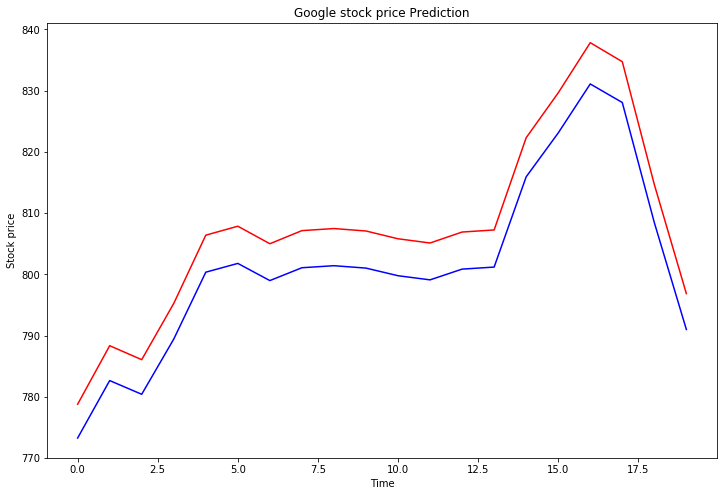

In [39]:
plt.figure(figsize=(12,8))
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')

In [31]:
real_stock[1:].shape

(19, 1)